Suppose you work for Amazon and they have asked you to (1) determine if a User should get a credit card (yes or no), and (2) determine which products to advertise to the User. 
Imagine that you have any/all of Amazon’s User data – anything you need. 

(a)	Design/create a small dataset that you can use to address the questions above. Paste it here. Keep it small with 3 – 4 columns and 25 – 30 rows. You decide the column/variable names and what the data would look like. It can be anything you want that also makes sense with respect to the question. You create the dataset you need.

In [2]:
import pandas as pd
import numpy as np

In [45]:
df = pd.DataFrame()
df['user_id'] = range(1, 26)
df['credit_score'] = np.random.randint(300, 850, 25)
df['delinquency'] = np.select([df['credit_score'] < 600], [1], default=0)
df['last_three_purchases'] = [np.random.choice(['Electronics', 'Tools', 'Clothing'], 3, replace=True).tolist() for _ in range(25)]
display(df)

,user_id,credit_score,delinquency,last_three_purchases
0,1,584,1,"[Clothing, Clothing, Electronics]"
1,2,429,1,"[Clothing, Tools, Clothing]"
2,3,808,0,"[Tools, Electronics, Tools]"
3,4,504,1,"[Electronics, Tools, Tools]"
4,5,423,1,"[Clothing, Tools, Tools]"
5,6,393,1,"[Clothing, Tools, Electronics]"
6,7,462,1,"[Clothing, Clothing, Electronics]"
7,8,420,1,"[Clothing, Tools, Electronics]"
8,9,492,1,"[Electronics, Electronics, Clothing]"
9,10,398,1,"[Tools, Tools, Tools]"


In [46]:
df.to_csv('exam4_q3.csv', index=False)

(b)	Next, describe, illustrate, and perform (in Python or R) whatever you think you need to do so that you can address the questions asked properly. 
The reason why you are not being told what tools/methods/models to use is because on the job – you are the data scientist and you determine what to use, what to do, what the results mean, and how to present it. Please do that here.

,user_id,credit_score,delinquency,last_three_purchases
0,1,584,1,"['Clothing', 'Clothing', 'Electronics']"
1,2,429,1,"['Clothing', 'Tools', 'Clothing']"
2,3,808,0,"['Tools', 'Electronics', 'Tools']"
3,4,504,1,"['Electronics', 'Tools', 'Tools']"
4,5,423,1,"['Clothing', 'Tools', 'Tools']"
5,6,393,1,"['Clothing', 'Tools', 'Electronics']"
6,7,462,1,"['Clothing', 'Clothing', 'Electronics']"
7,8,420,1,"['Clothing', 'Tools', 'Electronics']"
8,9,492,1,"['Electronics', 'Electronics', 'Clothing']"
9,10,398,1,"['Tools', 'Tools', 'Tools']"


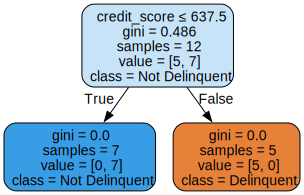

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree

df = pd.read_csv('exam4_q3.csv')
display(df)

X = df[['credit_score']]
y = df['delinquency'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

dt_model = DecisionTreeClassifier(criterion='gini', max_depth=1)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
accuracy_score(y_test, y_pred)

# visualize the decision tree
dot_data = tree.export_graphviz(dt_model, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['Delinquent', 'Not Delinquent'],  
                                filled=True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('decision_tree', format='png', cleanup=True)
graph

In [51]:
# ARM
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

df = pd.read_csv('exam4_q3.csv')
df['Electronics'] = df['last_three_purchases'].apply(lambda x: 'Electronics' in x)
df['Tools'] = df['last_three_purchases'].apply(lambda x: 'Tools' in x)
df['Clothing'] = df['last_three_purchases'].apply(lambda x: 'Clothing' in x)
df.drop('last_three_purchases', axis=1, inplace=True)

frequent_itemsets = apriori(df[['Electronics', 'Tools', 'Clothing']], min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)
display(rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Electronics),(Clothing),0.68,0.80,0.52,0.764706,0.955882,-2.400000e-02,0.850000,-1.260504e-01
1,(Clothing),(Tools),0.80,0.68,0.56,0.700000,1.029412,1.600000e-02,1.066667,1.428571e-01
2,(Tools),(Clothing),0.68,0.80,0.56,0.823529,1.029412,1.600000e-02,1.133333,8.928571e-02
3,"(Electronics, Tools)",(Clothing),0.40,0.80,0.32,0.800000,1.000000,-5.551115e-17,1.000000,-2.891206e-16
